# 생선 분류하기

KNeighborsClassifier을 이용해 도미(bream) 35마리와 빙어(smelt) 14마리 분류하기

생선 데이터셋 출처 : https://www.kaggle.com/datasets/aungpyaeap/fish-market

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier

## 데이터셋

In [5]:
# bream(도미) 데이터 35개
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [6]:
# smelt(빙어) 데이터 14개
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

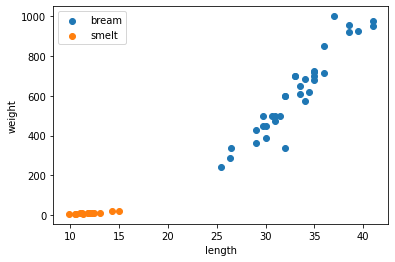

In [7]:
plt.scatter(bream_length, bream_weight, label='bream')
plt.scatter(smelt_length, smelt_weight, label='smelt')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

* bream(파랑) smelt(주황) 모두 길이와 무게가 비례하지만, 늘어나는 정도가 다르다.
* smelt의 산점도는 선형적이지만, 무게가 길이에 영향을 덜 받는다고 할 수 있따.

In [8]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

pd.DataFrame(zip(length, weight), columns=['length', 'weight'])

,length,weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0
5,29.7,450.0
6,29.7,500.0
7,30.0,390.0
8,30.0,450.0
9,30.7,500.0


* zip() : 나열된 리스트 각각에서 하나씩 원소를 꺼내 반환
* 리스트 컴프리헨션

In [9]:
fish_data = [[l,w] for l,w in zip(length, weight)]  # 2차원 리스트 형태로 만들기

In [10]:
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [13]:
# 정답값
fish_target = [1] * 35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## KNeighborsClassifier (k-최근접 이웃 알고리즘)

KNeighborsClassifier을 이용해 도미(bream) 35마리와 빙어(smelt) 14마리 분류

첫 번째 머신러닝 프로그램

In [14]:
kn = KNeighborsClassifier(n_jobs=-1)  # n_jobs=-1 : 모든 CPU 코어 사용

### fit(), score(), predict()

In [15]:
kn.fit(fish_data, fish_target)

KNeighborsClassifier(n_jobs=-1)

In [16]:
kn.score(fish_data, fish_target)

1.0

In [19]:
kn49 = KNeighborsClassifier(n_neighbors=49, n_jobs=-1)  # 가장 가까운 데이터 49개를 참고하여 분류
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

In [20]:
print(35/49)

0.7142857142857143


뭔가 이상하다.

train데이터로 test까지 한 격. 당연히 score는 만점이 나올 수 밖에.

데이터를 train, test로 적절히 나눠야 하겠다.